In [ ]:
#一维线性回归的代码实现

import numpy as np

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype = np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype = np.float32)

#绘制散点图
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)
plt.show()

#将numpy.array转换成Tensor
import torch

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

#建立线性回归模型
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        out = self.linear(x)
        return out

if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()

#定义损失函数和优化函数
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-3)

#训练线性回归模型
from torch.autograd import Variable

num_epochs = 1000
for epoch in range(num_epochs):
    if torch.cuda.is_available():
        inputs = Variable(x_train).cuda()
        target = Variable(y_train).cuda()
    else:
        inputs = Variable(x_train)
        target = Variable(y_train)

    #前向传播
    out = model(inputs)
    loss = criterion(out, target)
    
    #反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 200 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(epoch + 1, num_epochs, loss.data))

#用线性回归模型进行预测
model.eval() #将模型变成测试模式
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label = 'Original data')
plt.plot(x_train.numpy(), predict, label = 'Fitting Line')

plt.show()


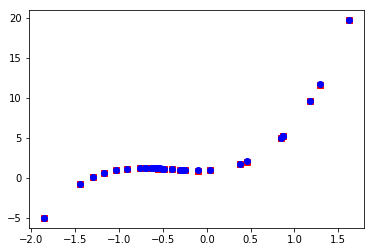

In [15]:
#多项式回归的代码实现
import torch

#数据预处理
def make_features(x):
    '''Builds features i.e. a matrix with colums [x, x^2, x^3].'''
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, 4)], 1)

#定义真实函数
w_target = torch.FloatTensor([0.5, 3, 2.4]).unsqueeze(1)
b_target = torch.FloatTensor([0.9])

def f(x):
    return x.mm(w_target) + b_target[0]

#随机生成训练集
from torch.autograd import Variable

def get_batch(batch_size = 32):
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    if torch.cuda.is_available():
        return Variable(x).cuda(), Variable(y).cuda()
    else:
        return Variable(x), Variable(y)

#定义模型
import torch.nn as nn

class poly_model(nn.Module):
    def __init__(self):
        super(poly_model, self).__init__()
        self.poly = nn.Linear(3, 1)
    
    def forward(self, x):
        out = self.poly(x)
        return out

if torch.cuda.is_available():
    model = poly_model().cuda()
else:
    model = poly_model()

#定义损失函数和优化器
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-3)

#训练模型
while True:
    batch_x, batch_y = get_batch()
    output = model(batch_x)
    loss = criterion(output, batch_y)
    print_loss = loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()   
    
    if print_loss < 1e-3:
        break
#使用训练后的模型进行预测
'''由于无法绘制曲线图，只能绘制散点图'''
import matplotlib.pyplot as plt

model.eval()
predict = model(batch_x)
plt.plot(batch_x.data.numpy()[:, 0], batch_y.data.numpy(), 'rs')
plt.plot(batch_x.data.numpy()[:, 0], predict.data.numpy(), 'bo')
plt.show()